# Task 5 - Credit card Fraud Detection
<h3>Mageshwaran Sankar<h3>

# Data Preprocessing

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

!pip install xgboost
!pip install lightgbm

!pip install imblearn
import xgboost as xgb
import lightgbm as lgb
# import catboost as catb
from imblearn.over_sampling import SMOTE

pd.options.display.max_columns=None

In [38]:
dataset=pd.read_csv("/content/creditcard.csv")

In [39]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [40]:
dataset.shape

(75357, 31)

In [41]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [42]:
dataset.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [43]:
dataset.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

In [44]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [45]:
dataset.dropna(inplace=True)

# Splitting the Features

In [46]:
X = dataset.drop(['Class'], axis=1)
y = dataset['Class']

# Treating Outliers

In [47]:
columns=X.select_dtypes(include=['int','float']).columns.tolist()

In [48]:
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [49]:
len(columns)

30

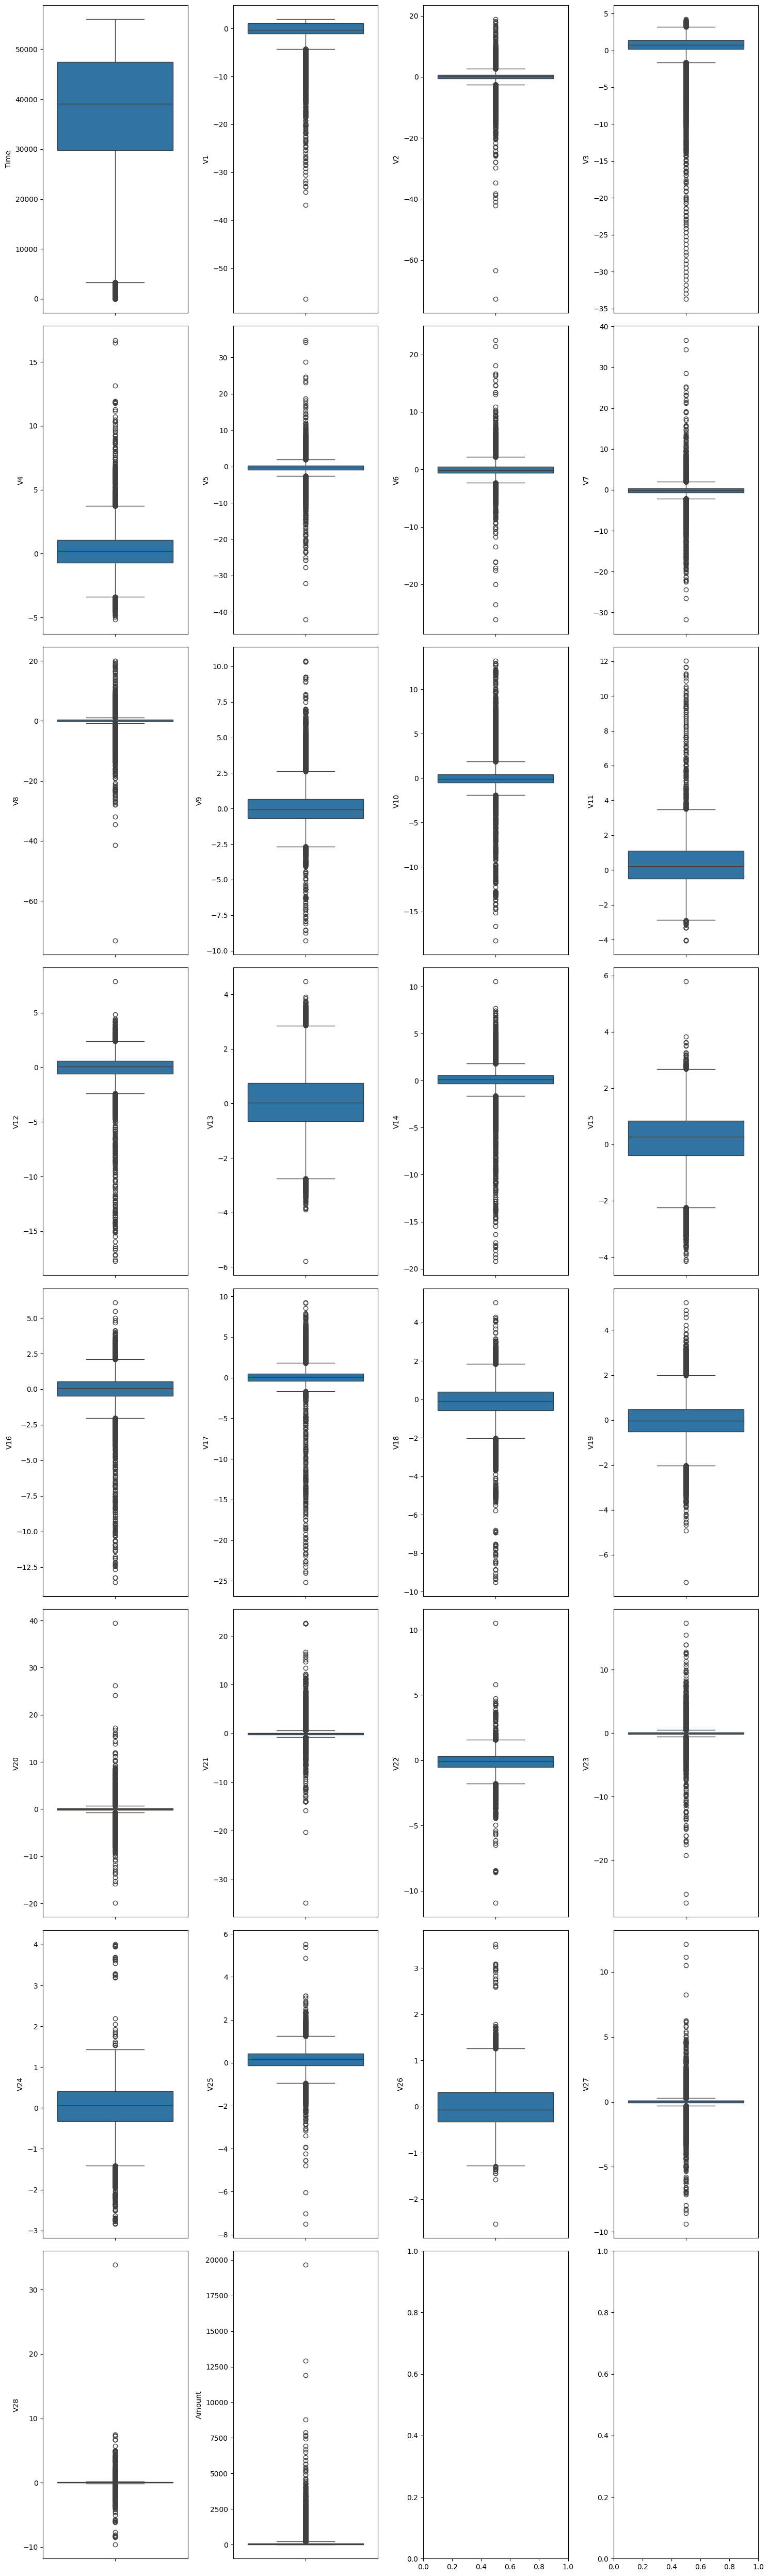

In [50]:
fig,ax=plt.subplots(nrows=8,ncols=4,figsize=(15,50))

for index,col in enumerate(columns):
    r=index//4
    c=index%4
    sns.boxplot(data=X,y=col,ax=ax[r][c])
    plt.tight_layout()

In [51]:
# Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(X)

# Filtering out the outliers
mask = outliers != -1
X, y = X[mask], y[mask]

# Model Creation

In [52]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)




In [53]:
# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [54]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    return accuracy, precision, recall, f1, tn, fp, fn, tp

# Initialize results list
results = []


Decision Tree

In [55]:
# Decision Tree
dt_params = {'max_depth': [5, 10, 15]}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_params, scoring='accuracy', cv=3, n_jobs=-1)
dt_grid_search.fit(X_train_resampled, y_train_resampled)
dt_best_model = dt_grid_search.best_estimator_
dt_accuracy, dt_precision, dt_recall, dt_f1, dt_tn, dt_fp, dt_fn, dt_tp = evaluate_model(dt_best_model, X_train_resampled, y_train_resampled, X_test, y_test)

results.append({
    'Model': 'DecisionTree',
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'F1 Score': dt_f1,
    'True Negative': dt_tn,
    'False Positive': dt_fp,
    'False Negative': dt_fn,
    'True Positive': dt_tp
})


Random Forest

In [56]:
# Random Forest
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_params, scoring='accuracy', cv=3, n_jobs=-1)
rf_grid_search.fit(X_train_resampled, y_train_resampled)
rf_best_model = rf_grid_search.best_estimator_
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_tn, rf_fp, rf_fn, rf_tp = evaluate_model(rf_best_model, X_train_resampled, y_train_resampled, X_test, y_test)

results.append({
    'Model': 'RandomForest',
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1 Score': rf_f1,
    'True Negative': rf_tn,
    'False Positive': rf_fp,
    'False Negative': rf_fn,
    'True Positive': rf_tp
})


AdaBoost

In [57]:
# AdaBoost
ab_params = {'n_estimators': [50, 100]}
ab_grid_search = GridSearchCV(AdaBoostClassifier(), ab_params, scoring='accuracy', cv=3, n_jobs=-1)
ab_grid_search.fit(X_train_resampled, y_train_resampled)
ab_best_model = ab_grid_search.best_estimator_
ab_accuracy, ab_precision, ab_recall, ab_f1, ab_tn, ab_fp, ab_fn, ab_tp = evaluate_model(ab_best_model, X_train_resampled, y_train_resampled, X_test, y_test)

results.append({
    'Model': 'AdaBoost',
    'Accuracy': ab_accuracy,
    'Precision': ab_precision,
    'Recall': ab_recall,
    'F1 Score': ab_f1,
    'True Negative': ab_tn,
    'False Positive': ab_fp,
    'False Negative': ab_fn,
    'True Positive': ab_tp
})

Bagging

In [58]:
# Bagging
bg_params = {'n_estimators': [10, 20]}
bg_grid_search = GridSearchCV(BaggingClassifier(), bg_params, scoring='accuracy', cv=3, n_jobs=-1)
bg_grid_search.fit(X_train_resampled, y_train_resampled)
bg_best_model = bg_grid_search.best_estimator_
bg_accuracy, bg_precision, bg_recall, bg_f1, bg_tn, bg_fp, bg_fn, bg_tp = evaluate_model(bg_best_model, X_train_resampled, y_train_resampled, X_test, y_test)

results.append({
    'Model': 'Bagging',
    'Accuracy': bg_accuracy,
    'Precision': bg_precision,
    'Recall': bg_recall,
    'F1 Score': bg_f1,
    'True Negative': bg_tn,
    'False Positive': bg_fp,
    'False Negative': bg_fn,
    'True Positive': bg_tp
})

XGBoost

In [59]:
# XGBoost
xgb_params = {'n_estimators': [100, 200], 'max_depth': [3, 6]}
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, scoring='accuracy', cv=3, n_jobs=-1)
xgb_grid_search.fit(X_train_resampled, y_train_resampled)
xgb_best_model = xgb_grid_search.best_estimator_
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, xgb_tn, xgb_fp, xgb_fn, xgb_tp = evaluate_model(xgb_best_model, X_train_resampled, y_train_resampled, X_test, y_test)

results.append({
    'Model': 'XGBoost',
    'Accuracy': xgb_accuracy,
    'Precision': xgb_precision,
    'Recall': xgb_recall,
    'F1 Score': xgb_f1,
    'True Negative': xgb_tn,
    'False Positive': xgb_fp,
    'False Negative': xgb_fn,
    'True Positive': xgb_tp
})


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:02:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


LightGBM

In [60]:
# LightGBM
lgb_params = {'n_estimators': [100, 200], 'num_leaves': [31, 63]}
lgb_grid_search = GridSearchCV(lgb.LGBMClassifier(), lgb_params, scoring='accuracy', cv=3, n_jobs=-1)
lgb_grid_search.fit(X_train_resampled, y_train_resampled)
lgb_best_model = lgb_grid_search.best_estimator_
lgb_accuracy, lgb_precision, lgb_recall, lgb_f1, lgb_tn, lgb_fp, lgb_fn, lgb_tp = evaluate_model(lgb_best_model, X_train_resampled, y_train_resampled, X_test, y_test)

results.append({
    'Model': 'LightGBM',
    'Accuracy': lgb_accuracy,
    'Precision': lgb_precision,
    'Recall': lgb_recall,
    'F1 Score': lgb_f1,
    'True Negative': lgb_tn,
    'False Positive': lgb_fp,
    'False Negative': lgb_fn,
    'True Positive': lgb_tp
})


[LightGBM] [Info] Number of positive: 59626, number of negative: 59626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119252, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


# Evaluation

In [61]:
result_df = pd.DataFrame(results)
result_df.sort_values(by='Accuracy', ascending=False, inplace=True)


In [62]:
result_df

,Model,Accuracy,Precision,Recall,F1 Score,True Negative,False Positive,False Negative,True Positive
5,LightGBM,0.999732,1.000000,0.714286,0.833333,14907,0,4,10
1,RandomForest,0.999665,0.909091,0.714286,0.800000,14906,1,4,10
4,XGBoost,0.999531,0.769231,0.714286,0.740741,14904,3,4,10
3,Bagging,0.999330,0.642857,0.642857,0.642857,14902,5,5,9
0,DecisionTree,0.994705,0.117647,0.714286,0.202020,14832,75,4,10
2,AdaBoost,0.994303,0.109890,0.714286,0.190476,14826,81,4,10


In [63]:
models = result_df['Model']
num_models = len(models)
bar_width = 0.35
index = np.arange(num_models)

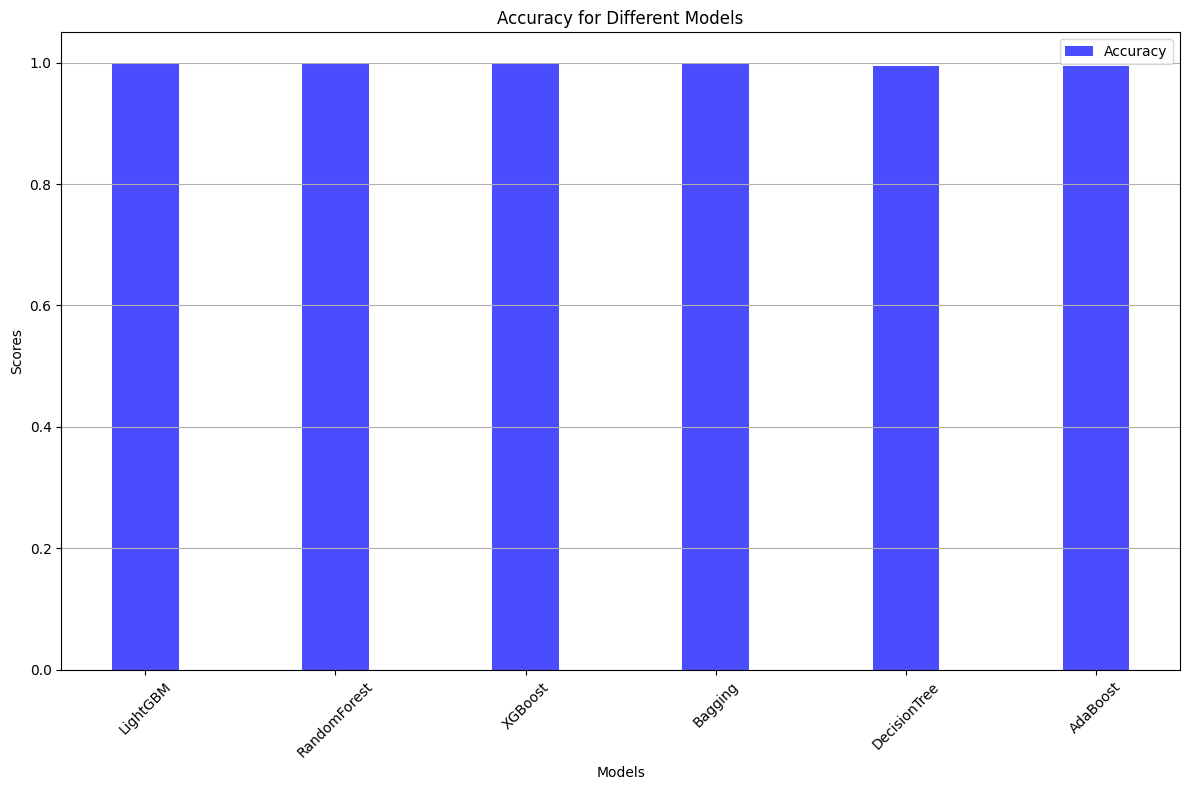

In [66]:
plt.figure(figsize=(12, 8))

plt.bar(index,result_df['Accuracy'],bar_width,label='Accuracy',color='b',alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Accuracy for Different Models')
plt.xticks(index,models,rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [70]:
#loading my model
import pickle
pickle.dump(lgb_best_model,open('/content/model.pkl','wb'))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')